PV-Lib

In [47]:
import numpy as np

In [2]:
print(np.pi)
print(np.e)

3.141592653589793
2.718281828459045


In [3]:
angle = np.pi/4
print(np.sin(angle))
print(np.cos(angle))
print(np.tan(angle))

0.7071067811865476
0.7071067811865476
0.9999999999999999


In [4]:
xList = [1, 2, 3, 4]

In [8]:
for x in xList:
    print("sin({0}) = {1:f}".format(x,np.sin(x)))

sin(1) = 0.841471
sin(2) = 0.909297
sin(3) = 0.141120
sin(4) = -0.756802


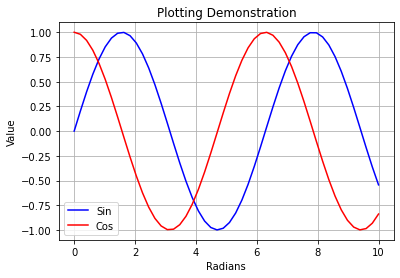

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10)
y = np.sin(x)
z = np.cos(x)

plt.plot(x,y,'b',x,z,'r')
plt.xlabel('Radians');
plt.ylabel('Value');
plt.title('Plotting Demonstration')
plt.legend(['Sin','Cos'])
plt.grid()

In [49]:
import os  # for getting environment variables
import pathlib  # for finding the example dataset
import pandas as pd  # for data wrangling
import matplotlib.pyplot as plt  # for visualization

In [11]:
pip install pvlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pvlib

In [14]:
print(pvlib.__version__)

0.9.1


In [15]:
help(pvlib.iotools.read_tmy3)

Help on function read_tmy3 in module pvlib.iotools.tmy:

read_tmy3(filename, coerce_year=None, recolumn=True)
    Read a TMY3 file in to a pandas dataframe.
    
    Note that values contained in the metadata dictionary are unchanged
    from the TMY3 file (i.e. units are retained). In the case of any
    discrepancies between this documentation and the TMY3 User's Manual
    [1]_, the TMY3 User's Manual takes precedence.
    
    The TMY3 files were updated in Jan. 2015. This function requires the
    use of the updated files.
    
    Parameters
    ----------
    filename : str
        A relative file path or absolute file path.
    
    coerce_year : None or int, default None
        If supplied, the year of the index will be set to `coerce_year`, except
        for the last index value which will be set to the *next* year so that
        the index increases monotonically.
    
    recolumn : bool, default True
        If ``True``, apply standard names to TMY3 columns. Typically th

In [16]:
DATA_DIR = pathlib.Path(pvlib.__file__).parent / 'data'
df_tmy, meta_dict = pvlib.iotools.read_tmy3(DATA_DIR / '723170TYA.CSV', coerce_year=1990)
meta_dict  # display the dictionary of metadata

{'USAF': 723170,
 'Name': '"GREENSBORO PIEDMONT TRIAD INT"',
 'State': 'NC',
 'TZ': -5.0,
 'latitude': 36.1,
 'longitude': -79.95,
 'altitude': 273.0}

In [17]:
df_tmy.head()

,Date (MM/DD/YYYY),Time (HH:MM),ETR,ETRN,GHI,GHISource,GHIUncertainty,DNI,DNISource,DNIUncertainty,...,Alb,AlbSource,AlbUncertainty,Lprecipdepth,Lprecipquantity,LprecipSource,LprecipUncertainty,PresWth,PresWthSource,PresWthUncertainty
1990-01-01 01:00:00-05:00,01/01/1988,01:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 02:00:00-05:00,01/01/1988,02:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 03:00:00-05:00,01/01/1988,03:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 04:00:00-05:00,01/01/1988,04:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8
1990-01-01 05:00:00-05:00,01/01/1988,05:00,0,0,0,1,0,0,1,0,...,0.0,?,0,0,1,D,9,0,C,8


In [19]:
print("Number of rows:", len(df_tmy))
print("Number of columns:", len(df_tmy.columns))

Number of rows: 8760
Number of columns: 71


In [23]:
df_tmy.iloc[0]

Date (MM/DD/YYYY)     01/01/1988
Time (HH:MM)               01:00
ETR                            0
ETRN                           0
GHI                            0
                         ...    
LprecipSource                  D
LprecipUncertainty             9
PresWth                        0
PresWthSource                  C
PresWthUncertainty             8
Name: 1990-01-01 01:00:00-05:00, Length: 71, dtype: object

In [22]:
df_tmy.loc['1990-01-01 01:00:00-05:00']

Date (MM/DD/YYYY)     01/01/1988
Time (HH:MM)               01:00
ETR                            0
ETRN                           0
GHI                            0
                         ...    
LprecipSource                  D
LprecipUncertainty             9
PresWth                        0
PresWthSource                  C
PresWthUncertainty             8
Name: 1990-01-01 01:00:00-05:00, Length: 71, dtype: object

In [24]:
df_tmy.keys()

Index(['Date (MM/DD/YYYY)', 'Time (HH:MM)', 'ETR', 'ETRN', 'GHI', 'GHISource',
       'GHIUncertainty', 'DNI', 'DNISource', 'DNIUncertainty', 'DHI',
       'DHISource', 'DHIUncertainty', 'GHillum', 'GHillumSource',
       'GHillumUncertainty', 'DNillum', 'DNillumSource', 'DNillumUncertainty',
       'DHillum', 'DHillumSource', 'DHillumUncertainty', 'Zenithlum',
       'ZenithlumSource', 'ZenithlumUncertainty', 'TotCld', 'TotCldSource',
       'TotCldUncertainty', 'OpqCld', 'OpqCldSource', 'OpqCldUncertainty',
       'DryBulb', 'DryBulbSource', 'DryBulbUncertainty', 'DewPoint',
       'DewPointSource', 'DewPointUncertainty', 'RHum', 'RHumSource',
       'RHumUncertainty', 'Pressure', 'PressureSource', 'PressureUncertainty',
       'Wdir', 'WdirSource', 'WdirUncertainty', 'Wspd', 'WspdSource',
       'WspdUncertainty', 'Hvis', 'HvisSource', 'HvisUncertainty', 'CeilHgt',
       'CeilHgtSource', 'CeilHgtUncertainty', 'Pwat', 'PwatSource',
       'PwatUncertainty', 'AOD', 'AODSource', 'AODU

In [25]:
# GHI, DHI, DNI are irradiance measurements
# DryBulb is the "dry-bulb" (ambient) temperature
# Wspd is wind speed
df = df_tmy[['GHI', 'DHI', 'DNI', 'DryBulb', 'Wspd']]
# show the first 15 rows:
df.head(15)

,GHI,DHI,DNI,DryBulb,Wspd
1990-01-01 01:00:00-05:00,0,0,0,10.0,6.2
1990-01-01 02:00:00-05:00,0,0,0,10.0,5.2
1990-01-01 03:00:00-05:00,0,0,0,10.0,5.7
1990-01-01 04:00:00-05:00,0,0,0,10.0,5.7
1990-01-01 05:00:00-05:00,0,0,0,10.0,5.2
1990-01-01 06:00:00-05:00,0,0,0,10.0,4.1
1990-01-01 07:00:00-05:00,0,0,0,10.0,4.1
1990-01-01 08:00:00-05:00,9,9,1,10.0,5.2
1990-01-01 09:00:00-05:00,46,46,3,10.0,5.2
1990-01-01 10:00:00-05:00,79,78,4,10.6,5.2


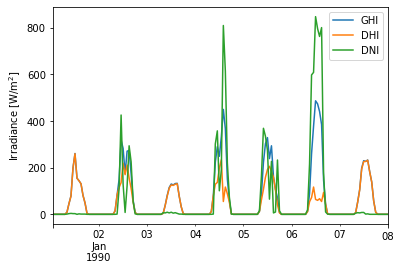

In [26]:
first_week = df.head(24*7)  # Plotting 7 days, each one has 24 hours or entries
first_week[['GHI', 'DHI', 'DNI']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

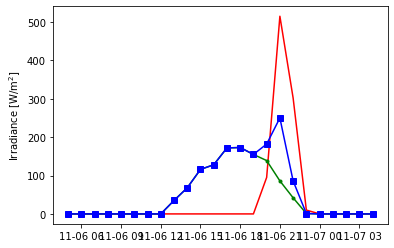

In [27]:
birthday = df.loc['1990-11-06':'1990-11-06']
plt.plot(birthday['DNI'], color='r') 
plt.plot(birthday['DHI'], color='g', marker='.') 
plt.plot(birthday['GHI'], color='b', marker='s') 
plt.ylabel('Irradiance [W/m$^2$]');

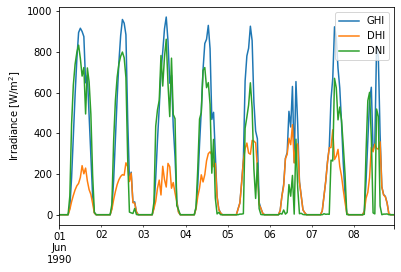

In [28]:
summer_week = df.loc['1990-06-01':'1990-06-08']
summer_week[['GHI', 'DHI', 'DNI']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

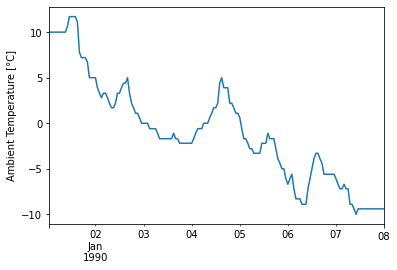

In [29]:
first_week['DryBulb'].plot()
plt.ylabel('Ambient Temperature [°C]');

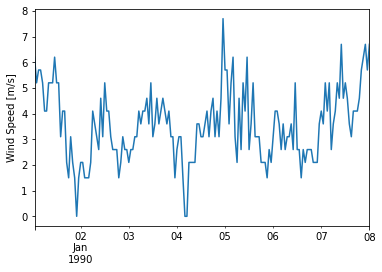

In [30]:
first_week['Wspd'].plot()
plt.ylabel('Wind Speed [m/s]');

In [31]:
# summing hourly irradiance (W/m^2) gives insolation (W h/m^2)
monthly_ghi = df['GHI'].resample('M').sum()
monthly_ghi.head(4)

1990-01-31 00:00:00-05:00     74848
1990-02-28 00:00:00-05:00     85751
1990-03-31 00:00:00-05:00    131766
1990-04-30 00:00:00-05:00    162302
Freq: M, Name: GHI, dtype: int64

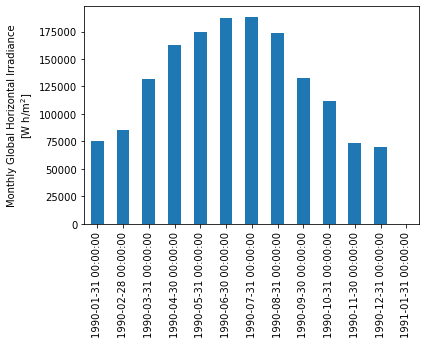

In [32]:
monthly_ghi = monthly_ghi.tz_localize(None)  # don't need timezone for monthly data
monthly_ghi.plot.bar()
plt.ylabel('Monthly Global Horizontal Irradiance\n[W h/m$^2$]');

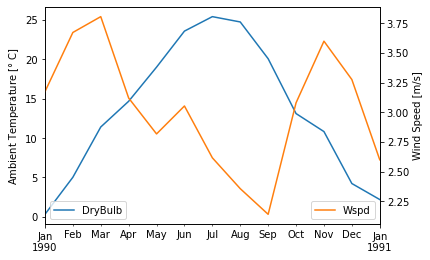

In [33]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # add a second y-axis
monthly_average_temp_wind = df[['DryBulb', 'Wspd']].resample('M').mean()
monthly_average_temp_wind['DryBulb'].plot(ax=ax1, c='tab:blue')
monthly_average_temp_wind['Wspd'].plot(ax=ax2, c='tab:orange')
ax1.set_ylabel(r'Ambient Temperature [$\degree$ C]')
ax2.set_ylabel(r'Wind Speed [m/s]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right');

<AxesSubplot:>

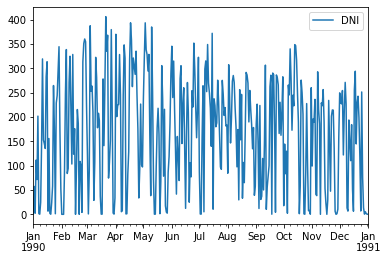

In [38]:
daily_average_DNI = df[['DNI']].resample('D').mean()  # Add the column name, and resample by day. Month is 'M', day is..
daily_average_DNI.plot()

In [39]:
NREL_API_KEY = None  # <-- please set your NREL API key here

# note you must use "quotes" around your key, for example:
# NREL_API_KEY = 'DEMO_KEY'  # single or double both work fine

# during the live tutorial, we've stored a dedicated key on our server
if NREL_API_KEY is None:
    try:
        NREL_API_KEY = os.environ['NREL_API_KEY']  # get dedicated key for tutorial from servier
    except KeyError:
        NREL_API_KEY = 'DEMO_KEY'  # OK for this demo, but better to get your own key

In [40]:
metadata, df_abq = pvlib.iotools.get_psm3(
    latitude=35.0844, longitude=-106.6504,
    api_key=NREL_API_KEY,
    email='mark.mikofski@dnv.com',  # <-- any email works here fine
    names='tmy')
metadata

C:\Users\lenovo\anaconda3\lib\site-packages\pvlib\iotools\psm3.py:335: pvlibDeprecationWarning: PSM3 variable names will be renamed to pvlib conventions by default starting in pvlib 0.11.0. Specify map_variables=True to enable that behavior now, or specify map_variables=False to hide this warning.
  warnings.warn(


,Year,Month,Day,Hour,Minute,Pressure,Wind Direction,DNI,Surface Albedo,DHI,Temperature,GHI,Dew Point,Wind Speed
2020-01-01 00:30:00-07:00,2020,1,1,0,30,845.0,324.0,0.0,0.17,0.0,-2.6,0.0,-8.8,1.6
2020-01-01 01:30:00-07:00,2020,1,1,1,30,845.0,327.0,0.0,0.17,0.0,-3.0,0.0,-9.1,1.5
2020-01-01 02:30:00-07:00,2020,1,1,2,30,844.0,333.0,0.0,0.17,0.0,-3.4,0.0,-9.4,1.4
2020-01-01 03:30:00-07:00,2020,1,1,3,30,844.0,336.0,0.0,0.17,0.0,-3.8,0.0,-9.7,1.4
2020-01-01 04:30:00-07:00,2020,1,1,4,30,844.0,334.0,0.0,0.17,0.0,-4.1,0.0,-9.8,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:30:00-07:00,2012,12,31,19,30,846.0,329.0,0.0,0.17,0.0,-0.7,0.0,-7.9,1.4
2012-12-31 20:30:00-07:00,2012,12,31,20,30,846.0,333.0,0.0,0.17,0.0,-1.3,0.0,-8.0,1.4
2012-12-31 21:30:00-07:00,2012,12,31,21,30,846.0,330.0,0.0,0.17,0.0,-1.7,0.0,-8.2,1.4
2012-12-31 22:30:00-07:00,2012,12,31,22,30,846.0,326.0,0.0,0.17,0.0,-1.9,0.0,-8.4,1.5


In [56]:
df_abq['Year'] = 1990
df_abq.index = pd.to_datetime(df_abq[['Year', 'Month', 'Day', 'Hour']])

ghi_comparison = pd.DataFrame({
    'NC': monthly_ghi,  # using the monthly values from earlier
    'NM': df_abq['GHI'].resample('M').sum(),
})

ghi_comparison.plot.bar()
plt.ylabel('Monthly GHI [W h/m^2]');

TypeError: unhashable type: 'list'